# Titanic

##kaggle 연결

In [3]:
!pip install kaggle

In [6]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"junssp","key":"1bde93c163ff198e31c11bc36c2d9634"}'}

In [7]:
ls -1ha kaggle.json # json 올라갔는지 확인

kaggle.json


In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# Permission Warning 이 일어나지 않도록 
!chmod 600 ~/.kaggle/kaggle.json

In [9]:
!kaggle datasets download -d hesh97/titanicdataset-traincsv

  0% 0.00/22.0k [00:00<?, ?B/s]
100% 22.0k/22.0k [00:00<00:00, 19.9MB/s]


In [10]:
!unzip titanicdataset-traincsv.zip

Archive:  titanicdataset-traincsv.zip
  inflating: train.csv               


##시작

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3

In [0]:
# Archive:  titanicdataset-traincsv.zip
# inflating: train.csv    
titanic = pd.read_csv('train.csv', error_bad_lines=False)

In [0]:
titanic.to_csv('titanic.csv', index=False, header=True)

## To SQL

In [0]:
conn = sqlite3.connect('titanic.db')

In [0]:
titanic.to_sql('titanic_table',conn, index=False, if_exists='replace')

## 분석

In [0]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [0]:
titanic.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.0,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.0,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.0,2.0000,3.0000,3.0,3.0000
Age,891.0,29.544332,13.013778,0.0,22.0000,29.0000,35.0,80.0000
SibSp,891.0,0.523008,1.102743,0.0,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.0,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


In [0]:
titanic.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Quick, Miss. Phyllis May",male,CA. 2343,G6,S
freq,1,577,7,4,644


In [0]:
# 	0 = No, 1 = Yes, 1 = 1st, 2 = 2nd, 3 = 3rd

titanic[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False) 

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [0]:
titanic[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [0]:
titanic[['Age', 'Survived']].groupby(['Age'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Age,Survived
0,0.42,1.0
9,5.00,1.0
79,63.00,1.0
68,53.00,1.0
1,0.67,1.0
...,...,...
37,28.50,0.0
49,36.50,0.0
46,34.50,0.0
26,20.50,0.0


In [0]:
titanic.Age.max()

80.0

In [0]:
titanic[titanic.Age==80]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0,A23,S


In [0]:
#승선 지역 위치 C = Cherbourg, Q = Queenstown, S = Southampton
titanic[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False) 

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [0]:
# parch 부모 자식 수 총 합
titanic[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False) 

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [0]:
# SibSp 배우자 형제 자매 총 합
titanic[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False) 

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [0]:
t_df = titanic.drop(columns=['Cabin', 'Ticket'])

In [0]:
titanic.Age = titanic.Age.fillna(titanic.Age.mean()).astype(int)

In [0]:
t_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29,1,2,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,30.0000,C


In [0]:
import seaborn as sns

categ = ['Pclass','Sex','SibSp','Parch','Embarked']

conti = ['Fare','Age']

 

# 분포

fig = plt.figure(figsize=(15,15))

for i in range(0,len(categ)):

    fig.add_subplot(3,3,i+1)

    sns.countplot(x=categ[i], data=titanic)

 

for col in conti:

    fig.add_subplot(3,3,i+2)

    sns.distplot(titanic[col].dropna());

    i += 1

    

plt.show()

fig.clear()

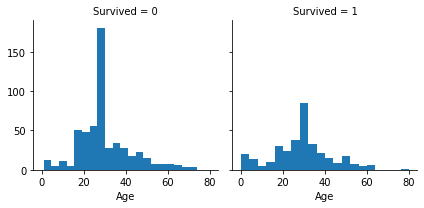

In [0]:
g = sns.FacetGrid(t_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

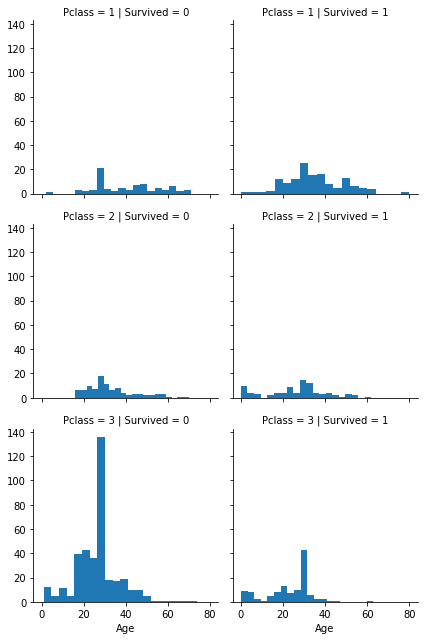

In [0]:
g = sns.FacetGrid(t_df, col='Survived', row='Pclass')
g.map(plt.hist, 'Age', bins=20)

In [0]:
g = sns.FacetGrid(t_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

In [0]:
# 사망 549 생존 342
t_df.Survived.value_counts() 

0    549
1    342
Name: Survived, dtype: int64

In [0]:
# 남 577 여 314
t_df.Sex.value_counts() 

male      577
female    314
Name: Sex, dtype: int64

In [0]:
# 1등급 184, 2등급 216, 3등급 491
t_df.Pclass.value_counts() 

3    491
1    216
2    184
Name: Pclass, dtype: int64